<br><br>
<h1 align="center"> 03b More Data Visualization and Inferences - ggplot </h1>
<br><br>

In [20]:
'''Import the libraries'''
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.display import HTML
import hashlib
import joblib
import datetime
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import r2_score

'''This notebook will use ggplot style'''
plt.style.use('ggplot')

colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

In [4]:
'''Load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan_data.csv', low_memory=False)

In [5]:
'''Update the datetime columns from string to datetime'''
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'])

In [6]:
'''For EDA, we will use the year 2018 data'''
loan_data_2018 = loan_data[loan_data['issue_d'].dt.year == 2018]
print(loan_data_2018.shape)

(57924, 38)


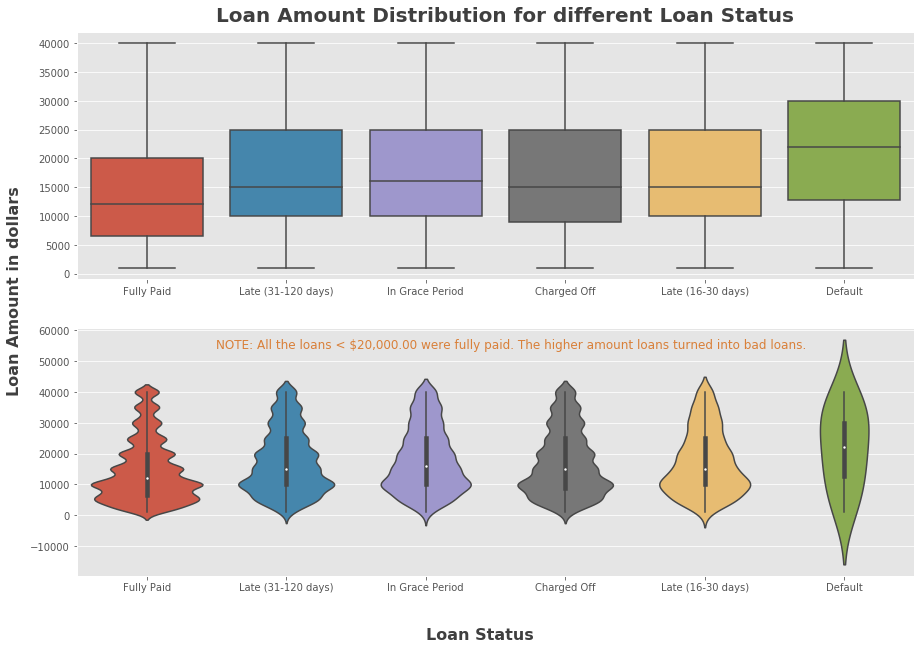

In [7]:
'''Loan Amount Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="loan_amnt", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="loan_amnt", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.text(x=0.5, y=160000, s='Loan Amount Distribution for different Loan Status', 
         fontsize=20, weight='bold', alpha=0.75)
plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

plt.text(x=0.5, y=54000, 
         s='NOTE: All the loans < $20,000.00 were fully paid. The higher amount loans turned into bad loans.', 
         fontsize=12, color=colors[4], alpha=0.75)


plt.savefig('plots/13.png', bbox_inches="tight")
plt.show()

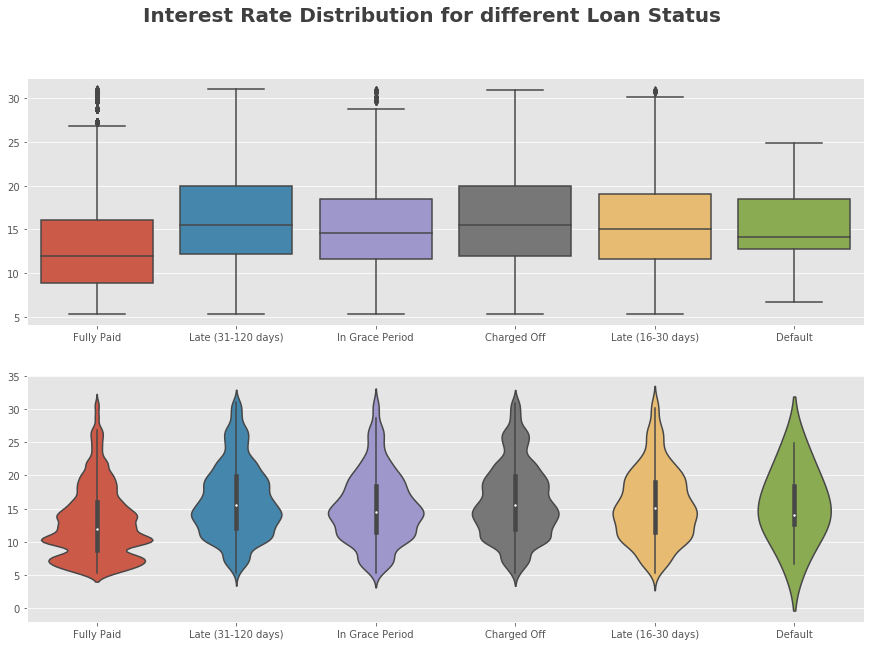

In [8]:
'''Interest Rate Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="int_rate", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="int_rate", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Interest Rate Distribution for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)

plt.savefig('plots/14.png', bbox_inches="tight")
plt.show()

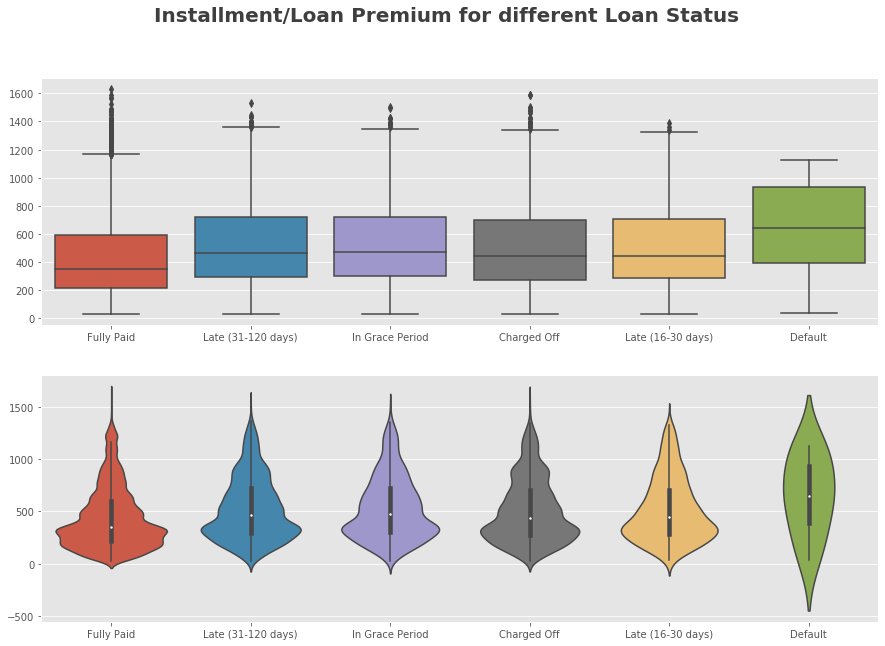

In [9]:
'''Installment Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="installment", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="installment", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Installment/Loan Premium for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)

plt.savefig('plots/15.png', bbox_inches="tight")
plt.show()

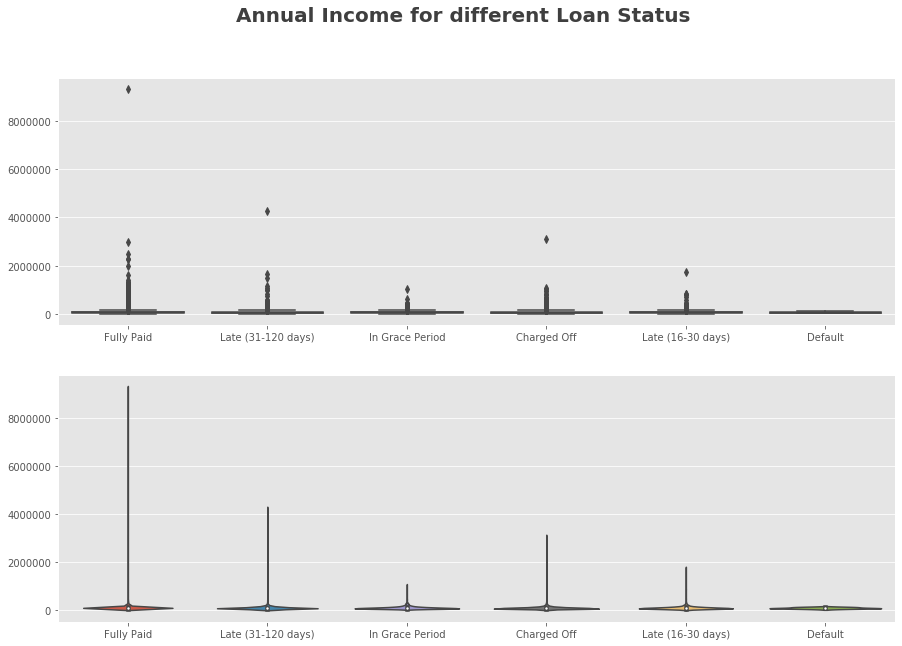

In [10]:
'''Annual Income Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="annual_inc", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="annual_inc", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Annual Income for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)

plt.savefig('plots/16.png', bbox_inches="tight")
plt.show()

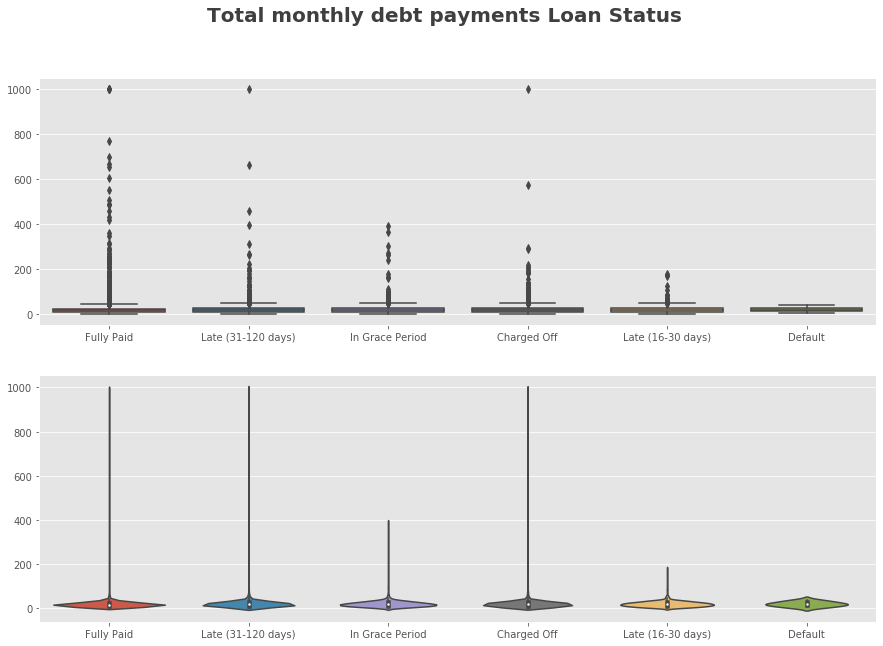

In [11]:
'''Total monthly debt payments Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="dti", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="dti", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Total monthly debt payments Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)

plt.savefig('plots/17.png', bbox_inches="tight")
plt.show()

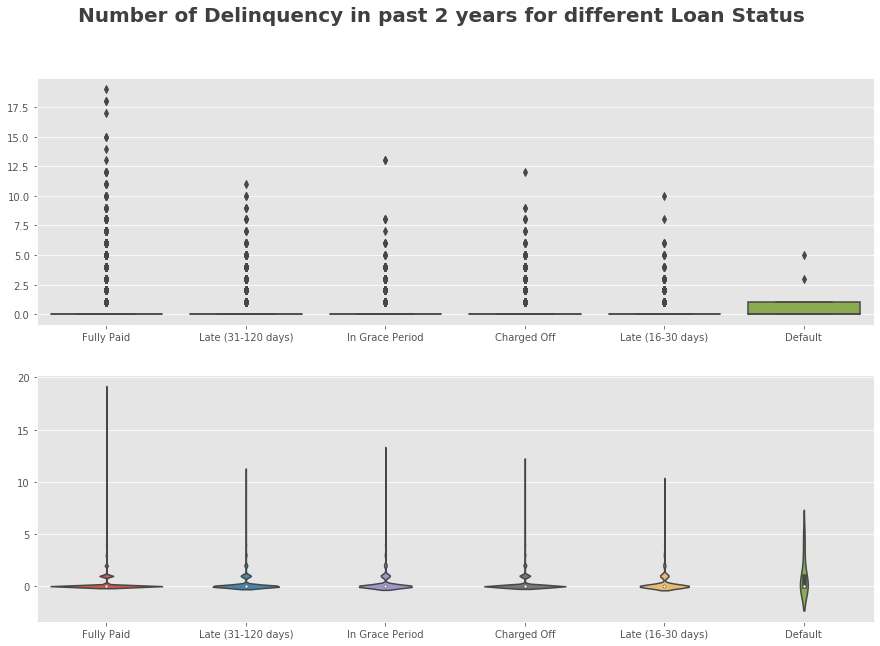

In [12]:
'''Number of Delinquency in past 2 years Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="delinq_2yrs", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="delinq_2yrs", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Number of Delinquency in past 2 years for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)

plt.savefig('plots/18.png', bbox_inches="tight")
plt.show()

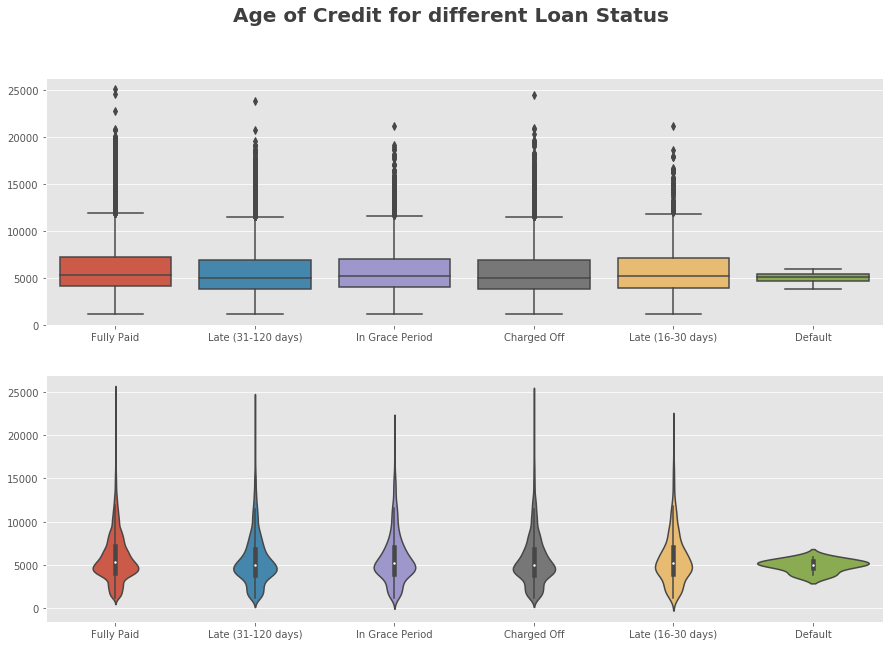

In [13]:
'''Age of Credit Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="age_of_credit_in_days", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="age_of_credit_in_days", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Age of Credit for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)

plt.savefig('plots/19.png', bbox_inches="tight")
plt.show()

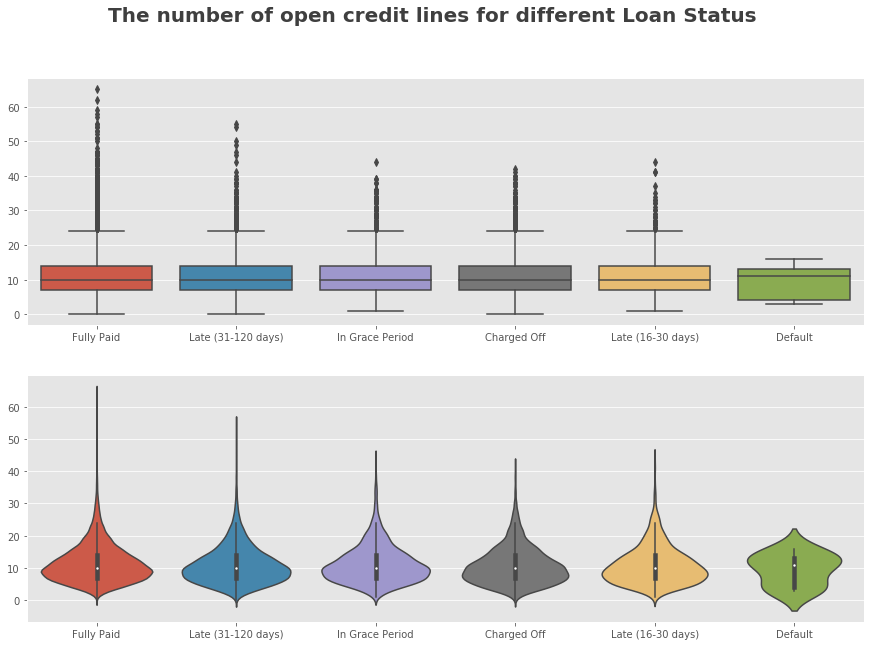

In [14]:
'''The number of open credit lines Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="open_acc", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="open_acc", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('The number of open credit lines for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)

plt.savefig('plots/20.png', bbox_inches="tight")
plt.show()

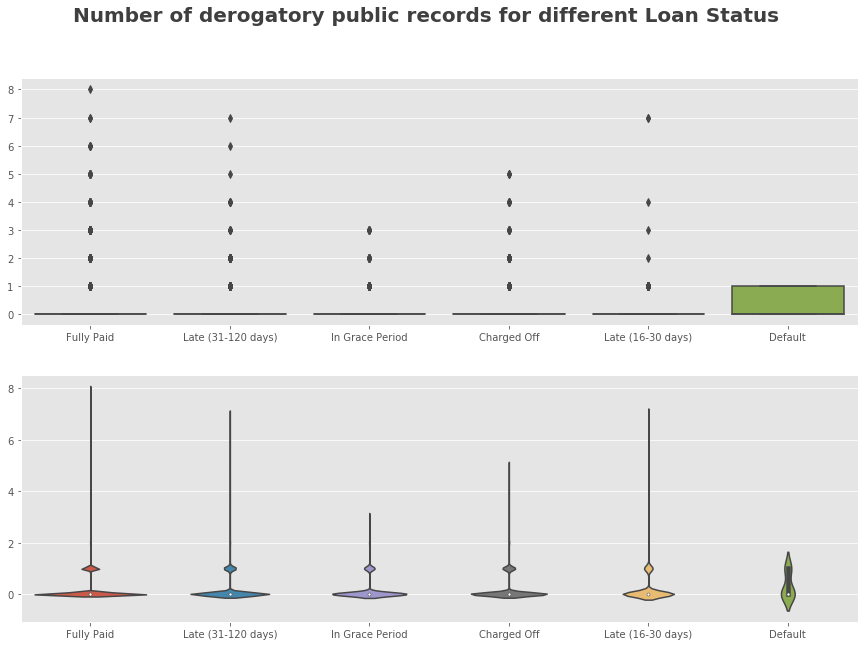

In [15]:
'''Number of derogatory public records Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="pub_rec", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="pub_rec", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Number of derogatory public records for different Loan Status', fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)

plt.savefig('plots/21.png', bbox_inches="tight")
plt.show()

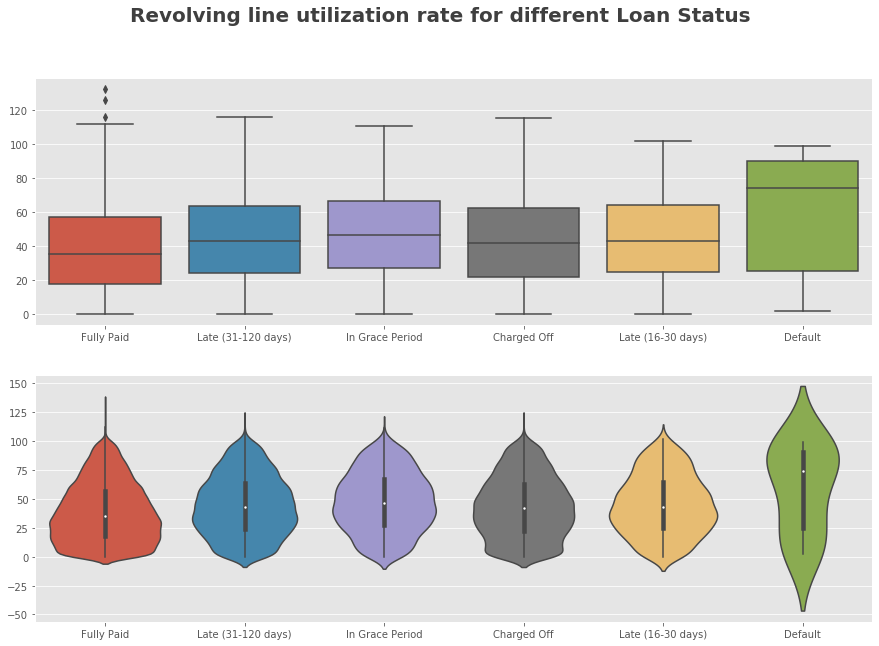

In [16]:
'''Revolving line utilization rate Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="revol_util", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="revol_util", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('Revolving line utilization rate for different Loan Status', 
             fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)

plt.savefig('plots/22.png', bbox_inches="tight")
plt.show()

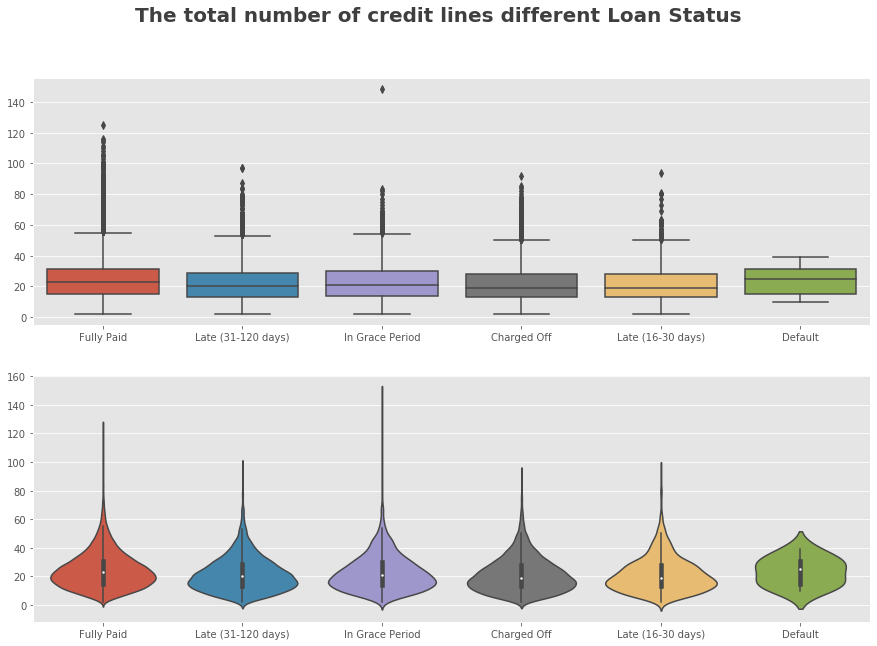

In [17]:
'''The total number of credit lines Distribution'''
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x="loan_status", y="total_acc", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 1, 2)
sns.violinplot(x='loan_status', y="total_acc", data=loan_data_2018)

plt.xlabel('')
plt.ylabel('')

plt.suptitle('The total number of credit lines different Loan Status', 
             fontsize=20, weight='bold', alpha=0.75)
#plt.text(x=-1, y=40000, s='Loan Amount in dollars', fontsize=16, weight='bold', rotation=90, alpha=0.75)
#plt.text(x=2, y=-40000, s='Loan Status', fontsize=16, weight='bold', alpha=0.75)

#plt.text(x=1.5, y=54000, s='NOTE: All the loans < $20,000.00 were fully paid.', fontsize=12, alpha=0.75)

plt.savefig('plots/23.png', bbox_inches="tight")
plt.show()

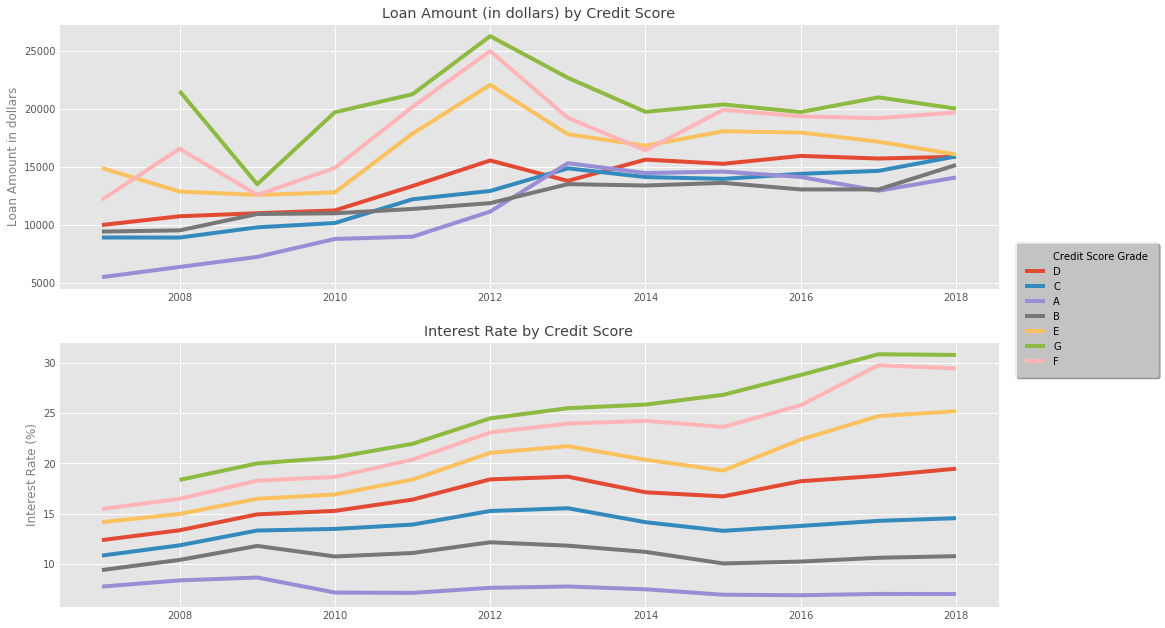

In [33]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.lineplot(x=loan_data['issue_d'].dt.year, y="loan_amnt", hue="grade", data=loan_data, ci=None, legend=None)

plt.title('Loan Amount (in dollars) by Credit Score', alpha=0.75)
plt.xlabel('')
plt.ylabel('Loan Amount in dollars', alpha=0.75)


plt.subplot(2, 1, 2)
sns.lineplot(x=loan_data['issue_d'].dt.year, y="int_rate", hue="grade", data=loan_data, ci=None)

plt.title('Interest Rate by Credit Score', alpha=0.75)
plt.xlabel('')
plt.ylabel('Interest Rate (%)', alpha=0.75)

#plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='lower right')
plt.legend(bbox_to_anchor=(1.175, 0.85), fancybox=True, framealpha=0.5, shadow=True, borderpad=1, 
           loc='lower right').texts[0].set_text("Credit Score Grade")

plt.savefig('plots/24.png', bbox_inches="tight")
plt.show()